In [1]:
import os, sys
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Embedding
from keras.layers import Dense, LSTM, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.utils import np_utils
import re

import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer as regextoken

Using TensorFlow backend.


# #LOADING THE DATA

In [2]:
os.getcwd()
os.chdir('D:/INSOFE Internship/CUTE4/train')
PATH = 'D:/INSOFE Internship/CUTE4'
data = pd.read_csv("train.csv",header=0)
test = pd.read_csv("test.csv",header=0)

# #UNDERSTAND THE DATA

In [3]:
data.shape 

test.shape 

data.columns

test.columns

Index(['ID', 'converse'], dtype='object')

# # DISPLAY THE INDEX

In [4]:
data.index

test.index

RangeIndex(start=0, stop=11455, step=1)

# # Understand the distribution of the data

In [5]:
data.describe(include='all')

,ID,categories,converse
count,45825.000000,45825,45796
unique,NaN,6,44465
top,NaN,PRESCRIPTION,clinical list changes medfusion secure electro...
freq,NaN,12077,133
mean,28645.024441,NaN,NaN
std,16545.373029,NaN,NaN
min,2.000000,NaN,NaN
25%,14296.000000,NaN,NaN
50%,28668.000000,NaN,NaN
75%,42965.000000,NaN,NaN


 # #DISPLAY THE DATA TYPE OF EACH VARIABLE

In [6]:
data.dtypes

ID             int64
categories    object
converse      object
dtype: object

# #Check the unique classes in categories column

In [7]:
np.unique(data['categories'])

pd.value_counts(data['categories'])

np.size(np.unique(data['categories']))

6

Text(0.5,1,'Distribution of the call categories')

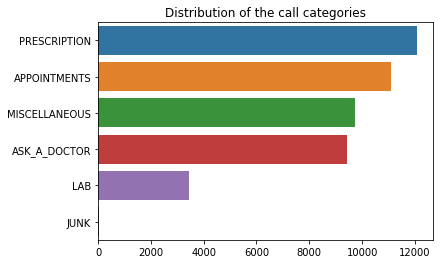

In [8]:
s=data['categories'].value_counts()

sns.barplot(x=s.values,y=s.index)

plt.title('Distribution of the call categories')

# # #Check the data for missing values

In [9]:
data.isnull().sum()

ID             0
categories     0
converse      29
dtype: int64

In [10]:
#Categories column is of 'object' type,changing it to category data type
data['categories'] = data['categories'].astype('category')

In [11]:
#Drop the ID column from both train and test data
data.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [12]:
#Check the data type after changing the data type to categorical
data.dtypes

#Check the columns 
data.columns

Index(['categories', 'converse'], dtype='object')

In [13]:
#Label Encoder encodes the categorical classes as different numbers
#Since the 'categories' column is the column to be predicted in test,set labels
#to the differone hot encoded verson
LabelEncoder = preprocessing.LabelEncoder()
labels = LabelEncoder.fit_transform(data['categories'])
y_labels= np_utils.to_categorical(labels, 6)
set(labels)
labels.shape

(45825,)

In [14]:
#Split the data into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(data.iloc[:,1], y_labels, test_size=0.3, random_state=123) 

In [15]:
#Converting the X_train and X_validation is now converted to array from 
#dataframe, for ease of use convert them to list so that they can be used in 
#tokenizer

x_train_sent=[i for i in X_train]

x_validation_sent=[j for j in X_validation ]

test_sent=[k for k in test.iloc[:,0]]

In [16]:
for i in range(0,32057):
    x_train_sent[i]=re.sub("[^a-zA-Z]", " ",str(x_train_sent[i]))
    x_train_sent[i].lower()

for i in range(0,13739):
    x_validation_sent[i]=re.sub("[^a-zA-Z]", " ",str(x_validation_sent[i]))
    x_validation_sent[i].lower()

for i in range(0,11455):
    test_sent[i]=re.sub("[^a-zA-Z]", " ",str(test_sent[i]))
    test_sent[i].lower()
    
    
complete=x_train_sent+x_validation_sent+test_sent

In [17]:
# Prepare tokenizer for train and validation
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(complete)
word_Index=tokenizer1.word_index
vocab_Size = len(tokenizer1.word_index) + 1
print('Found %s unique tokens.' % vocab_Size)

Found 39289 unique tokens.


In [18]:
# integer encode the documents
#train
sequences_train = tokenizer1.texts_to_sequences(x_train_sent)
print( sequences_train[1])

# integer encode the documents
#validation
sequences_validation = tokenizer1.texts_to_sequences(x_validation_sent)
print( sequences_validation[1])

# integer encode the documents
#test
sequences_test = tokenizer1.texts_to_sequences(test_sent)
print( sequences_test[1])

[295, 28, 107, 8, 267, 370, 2, 832, 295, 50, 110, 88, 359, 16, 697, 3, 2066, 1, 4003, 2, 200, 15, 3, 15, 16, 96, 887, 28, 107, 2, 203, 1, 668, 11, 1315, 5, 348, 3799, 2, 712, 112]
[107, 28, 52, 31, 121, 2, 31, 51, 63, 11, 197, 199, 11, 1390, 23, 5, 19, 233, 6, 10, 1027, 40, 53, 10, 168, 68, 6, 272, 807, 20, 67, 9, 27, 22, 26, 3, 89, 16, 31, 31, 189, 16, 506, 643, 16, 2319, 45, 17, 1985, 491, 251, 23, 31, 32, 361, 40, 80, 172, 135, 11, 23, 74, 35, 2, 36, 43, 135, 5, 2516, 298, 73, 157, 335, 203, 31, 1, 75, 106, 3, 64, 120, 16, 45, 984, 30, 688, 96, 48, 17, 973, 74, 79, 16, 31, 14, 9, 27]
[510, 18711, 59, 8, 60, 38, 60, 296, 2, 1, 26, 73, 13, 18711, 59, 20, 98, 127, 22, 26, 553, 8, 171, 325, 111, 72, 2, 72, 1447, 1494, 22, 26, 438, 16, 2, 6, 37, 35, 707, 4, 15, 226, 569, 88, 3, 2713, 16, 4162, 2, 67, 1, 480, 15, 3, 1, 72, 157, 35283, 6, 140, 61, 6, 445, 1, 247, 282, 88, 32, 425, 3, 1169, 44, 178, 19, 1, 194, 195, 3, 103, 19, 15, 69, 6, 272, 1, 289, 327, 45, 10, 410, 7, 19, 88, 359, 3, 1,

In [19]:
MAX_SEQUENCE_LENGTH = 700

train_pad = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of train_data tensor:', train_pad.shape)

validation_pad = pad_sequences(sequences_validation, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of validation_data tensor:', validation_pad.shape)

test_pad = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of test_data tensor:', test_pad.shape)

Shape of train_data tensor: (32077, 700)
Shape of validation_data tensor: (13748, 700)
Shape of test_data tensor: (11455, 700)


In [20]:
#model
model = Sequential()
model.add(Embedding(vocab_Size, 2, input_length=MAX_SEQUENCE_LENGTH ))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 700, 2)            78578     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 8406      
Total params: 86,984
Trainable params: 86,984
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#Fit the model
model.fit(train_pad, y_train,validation_data=(validation_pad, y_validation),epochs=4,batch_size=64,verbose=2)

Train on 32077 samples, validate on 13748 samples
Epoch 1/4
 - 4s - loss: 1.1685 - acc: 0.5321 - val_loss: 0.9078 - val_acc: 0.6614
Epoch 2/4
 - 4s - loss: 0.7911 - acc: 0.7181 - val_loss: 0.7249 - val_acc: 0.7439
Epoch 3/4
 - 5s - loss: 0.6587 - acc: 0.7733 - val_loss: 0.6685 - val_acc: 0.7606
Epoch 4/4
 - 5s - loss: 0.6017 - acc: 0.7933 - val_loss: 0.6467 - val_acc: 0.7682


In [24]:
# evaluate the model
loss, accuracy = model.evaluate(train_pad, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 80.634099


In [25]:
#Predict on validation

validation_pred = model.predict(validation_pad)

In [26]:
# evaluate the model
loss, accuracy = model.evaluate(validation_pad, y_validation, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 76.818446


In [27]:
#Predict on test
test_pred = model.predict(test_pad)

In [28]:
#test_pred

test_predictions =[]
for i in test_pred:
    test_predictions.append(np.argmax(i))

In [29]:
#Inverse_transform using labelencoder

test_predictions = LabelEncoder.inverse_transform(test_predictions)


In [30]:
#test_predictions
test = pd.read_csv("test.csv",header=0)

copy_test=test

In [31]:
#write to the output file
output = {'ID':copy_test['ID'],'categories': test_predictions}
output_df = pd.DataFrame(data=output)

pd.value_counts(output['categories'])

output_df.to_csv('predict1.csv',index=False)

In [32]:
#WITH GLOVE

In [33]:
embeddings_index = {}
f = open(os.path.join(PATH, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [34]:
embedding_Matrix = np.zeros((vocab_Size, 50))
for word, i in word_Index.items():
    embedding_Vector = embeddings_index.get(word)
    if embedding_Vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_Matrix[i] = embedding_Vector

print (embedding_Matrix.shape)

(39289, 50)


In [35]:
##Create the embedding layer

In [36]:
embedding_layer = Embedding(vocab_Size,
                            50,
                            weights=[embedding_Matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [37]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)  # global max pooling
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
preds = Dense(6, activation='softmax')(x)

model = Model(sequence_input, preds)

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 700)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 700, 50)           1964450   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 696, 64)           16064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 174, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 170, 64)           20544     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 42, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 38, 64)            20544     
__________

In [40]:
model.fit(train_pad, y_train,validation_data=(validation_pad, y_validation),epochs=3,batch_size=64,verbose=2)

Train on 32077 samples, validate on 13748 samples
Epoch 1/3
 - 232s - loss: 0.9824 - acc: 0.6212 - val_loss: 0.7470 - val_acc: 0.7255
Epoch 2/3
 - 222s - loss: 0.6654 - acc: 0.7557 - val_loss: 0.6440 - val_acc: 0.7608
Epoch 3/3
 - 276s - loss: 0.5876 - acc: 0.7832 - val_loss: 0.6677 - val_acc: 0.7512


In [41]:
# evaluate the model
loss, accuracy = model.evaluate(train_pad, y_train, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 79.262400


In [43]:
#Predict on validation

validation_pred = model.predict(validation_pad)

In [45]:
# evaluate the model
loss, accuracy = model.evaluate(validation_pad, y_validation, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 75.116381


In [46]:
#Predict on test
test_pred = model.predict(test_pad)

In [47]:
#test_pred

test_predictions =[]
for i in test_pred:
    test_predictions.append(np.argmax(i))

In [48]:
#Inverse_transform using labelencoder

test_predictions = LabelEncoder.inverse_transform(test_predictions)


In [49]:
#test_predictions
test = pd.read_csv("test.csv",header=0)

copy_test=test

In [50]:
#write to the output file
output = {'ID':copy_test['ID'],'categories': test_predictions}
output_df = pd.DataFrame(data=output)

pd.value_counts(output['categories'])

output_df.to_csv('predict3.csv',index=False)